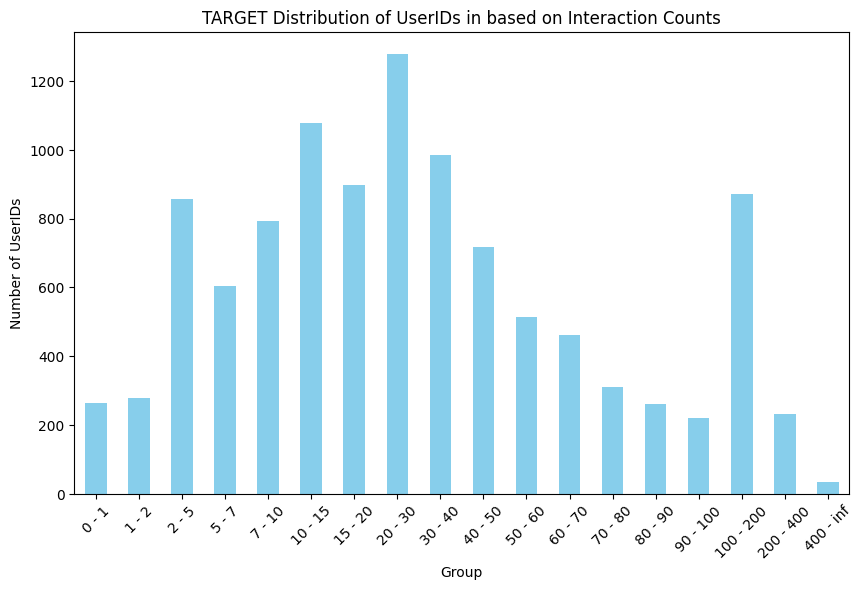

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with userID, itemID, and interaction
csv_file_path = 'data_train.csv'  # Replace with the actual file path
data = pd.read_csv(filepath_or_buffer=csv_file_path,
                                    sep=",",
                                    # header=None,
                                    dtype={0: int, 1: int, 2: int},
                                    engine='python')
data.columns = ["userID", "ItemID", "interaction"]
# Group users based on the number of interactions
user_interactions = data.groupby('userID')['interaction'].count().reset_index()
user_interactions.columns = ['userID', 'interaction_count']

# Define the groups based on interaction counts
#       0, 1, 2, 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  13,  14,  15,   16, 
bins = [0, 1, 2, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, float('inf')]
labels = [str(bins[0])+" - "+str(bins[1]), str(bins[1])+" - "+str(bins[2]), str(bins[2])+" - "+str(bins[3]), str(bins[3])+" - "+str(bins[4]), str(bins[4])+" - "+str(bins[5]), str(bins[5])+" - "+str(bins[6]), str(bins[6])+" - "+str(bins[7]), str(bins[7])+" - "+str(bins[8]), str(bins[8])+" - "+str(bins[9]), str(bins[9])+" - "+str(bins[10]), str(bins[10])+" - "+str(bins[11]), str(bins[11])+" - "+str(bins[12]), str(bins[12])+" - "+str(bins[13]), str(bins[13])+" - "+str(bins[14]), str(bins[14])+" - "+str(bins[15]), str(bins[15])+" - "+str(bins[16]), str(bins[16])+" - "+str(bins[17]), str(bins[17])+" - "+str(bins[18])]
user_interactions['group'] = pd.cut(user_interactions['interaction_count'], bins=bins, labels=labels)

# Open another CSV file with just userIDs
user_ids_file_path = 'data_target_users_test.csv'  # Replace with the actual file path
user_ids = pd.read_csv(filepath_or_buffer=user_ids_file_path,
                                               sep=",",
                                               # header=None,
                                               dtype={0: int},
                                               engine='python')
user_ids.columns = ['userID']
# Merge the userIDs with the grouped user information
merged_data = pd.merge(user_ids, user_interactions[['userID', 'group']], on='userID', how='left')

# Plot the distribution of userIDs in the 5 groups
plt.figure(figsize=(10, 6))
merged_data['group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('TARGET Distribution of UserIDs in based on Interaction Counts')
plt.xlabel('Group')
plt.ylabel('Number of UserIDs')
plt.xticks(rotation=45)
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with userID, itemID, and interaction
csv_file_path = 'data_train.csv'  # Replace with the actual file path
data = pd.read_csv(filepath_or_buffer=csv_file_path,
                                    sep=",",
                                    # header=None,
                                    dtype={0: int, 1: int, 2: int},
                                    engine='python')
data.columns = ["userID", "ItemID", "interaction"]
# Group users based on the number of interactions
user_interactions = data.groupby('userID')['interaction'].count().reset_index()
user_interactions.columns = ['userID', 'interaction_count']

# Define the groups based on interaction counts
bins = [0, 10, 20, 30, 40, float('inf')]
#labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
#user_interactions['group'] = pd.cut(user_interactions['interaction_count'], bins=bins, labels=labels)

# Open another CSV file with just userIDs
user_ids_file_path = 'data_target_users_test.csv'  # Replace with the actual file path
user_ids = pd.read_csv(filepath_or_buffer=user_ids_file_path,
                                               sep=",",
                                               # header=None,
                                               dtype={0: int},
                                               engine='python')
user_ids.columns = ['userID']
# Merge the userIDs with the grouped user information
merged_data = pd.merge(user_ids, user_interactions[['userID', 'interaction_count']], on='userID', how='left')

merged_data

,userID,interaction_count
0,1,44.0
1,2,38.0
2,3,4.0
3,4,39.0
4,5,75.0
...,...,...
10877,13020,35.0
10878,13021,197.0
10879,13022,8.0
10880,13023,26.0
